# How well do jobs and skills pay for Data Analysts?
### Methodology
1. Evaluate median salary for top 6 data jobs
2. Find median salary per skill for Data Analysts
3. Visualize for highest paying skills and most demanded skills

In [1]:
#Importing Libraries
import ast
import seaborn as sns
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])  # converting job_posted_date to datetime object
df['job_skills'] = df['job_skills'].apply(lambda data: ast.literal_eval(data) if pd.notna(data) else data)  # converting job_skills to list

In [3]:
df_US = df[(df['job_country'] == 'United States')].dropna(subset=['salary_year_avg'])  # filter for jobs country and drop NaN salary_year_avg values 

In [4]:
job_titles = df_US['job_title'].value_counts().index[:6].tolist()  # get top 6 data roles
job_titles

['Data Scientist',
 'Data Analyst',
 'Data Engineer',
 'Senior Data Engineer',
 'Senior Data Scientist',
 'Senior Data Analyst']

In [5]:
df_US_top6 = df_US[df_US['job_title'].isin(job_titles)]  # filter for jobs with specific job title in it 

In [9]:
job_order_list = df_US_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index  # create list of job titles sorted by median salary  

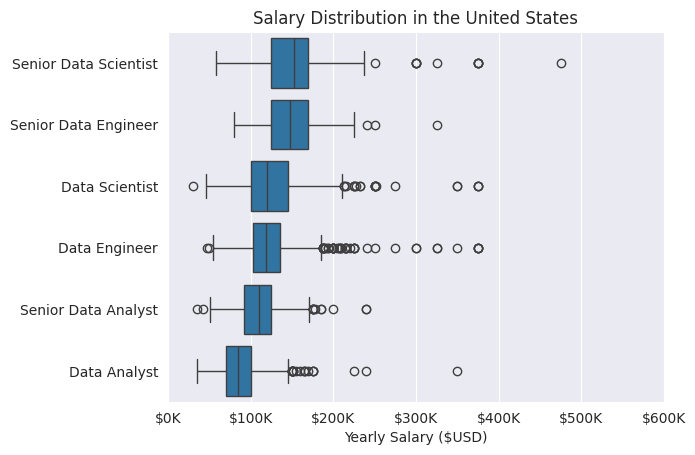

In [10]:
sns.boxplot(data=df_US_top6, x='salary_year_avg', y='job_title_short', order=job_order_list)

plt.title('Salary Distribution in the United States')
plt.xlabel('Yearly Salary ($USD)')
plt.ylabel('')
plt.xlim(0, 600000)
ticks_x = plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()